### Student Information
Name: 林柏辰

Student ID: 110061530

GitHub ID: Pochenlin513

Kaggle name: Po-Chen Lin

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

### Begin Assignment Here

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


Use `CountVectorizer` to calculate word frequency in each document

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

count_vect_train = CountVectorizer()
X_counts_train = count_vect_train.fit_transform(train_df.text)

count_vect_test = CountVectorizer()
X_counts_test = count_vect_test.fit_transform(test_df.text)

In [5]:
import numpy as np

term_frequencies_train = np.asarray(X_counts_train.sum(axis=0))[0]
term_frequencies_test = np.asarray(X_counts_test.sum(axis=0))[0]

In [6]:
idx_train = list(reversed(np.argsort(term_frequencies_train)[-30:]))
idx_test = list(reversed(np.argsort(term_frequencies_test)[-30:]))

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [7]:
print('[word: frequency]\n')
for i in idx_train:
    print('{}: {}'.format(count_vect_train.get_feature_names()[i], term_frequencies_train[i]))

[word: frequency]

the: 1736
to: 1289
and: 955
you: 796
of: 793
is: 787
it: 717
in: 626
that: 537
my: 535
for: 446
on: 390
be: 383
me: 380
this: 350
so: 328
have: 312
not: 303
just: 301
but: 293
with: 288
at: 269
can: 257
like: 243
all: 243
are: 231
your: 229
was: 228
when: 226
if: 216


#### Print top 30 words in test dataset

In [8]:
print('[word: frequency]\n')
for i in idx_test:
    print('{}: {}'.format(count_vect_test.get_feature_names()[i], term_frequencies_test[i]))

[word: frequency]

the: 153
to: 138
and: 92
it: 83
of: 83
you: 82
is: 77
in: 69
for: 57
that: 55
my: 52
on: 46
be: 40
me: 36
was: 34
so: 34
can: 32
at: 30
have: 30
all: 30
just: 29
are: 29
with: 29
but: 26
get: 26
your: 24
up: 24
this: 24
like: 24
not: 24


### ** >>> End Exercise 1 (Take home): **  

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

### TF-IDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
X_tfidf_train = tfidf_vect.fit_transform(train_df.text)

X_tfidf_test = tfidf_vect.transform(test_df.text)

#### Show the feature names for features [100:110].

In [10]:
tfidf_vect.get_feature_names()[100:110]

['attack',
 'attacks',
 'awareness',
 'away',
 'awe',
 'awful',
 'b',
 'baby',
 'back',
 'bad']

### ** >>> End Exercise 2 (Take home): **  

In [11]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

C:\Users\acer\.conda\envs\dataMining\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [12]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'anger', 'fear', 'anger', 'fear', 'anger', 'anger', 'anger',
       'anger', 'anger'], dtype=object)

In [13]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.65


In [14]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.68      0.66        84
        fear       0.64      0.67      0.66       110
         joy       0.68      0.65      0.66        79
     sadness       0.66      0.61      0.63        74

    accuracy                           0.65       347
   macro avg       0.66      0.65      0.65       347
weighted avg       0.65      0.65      0.65       347



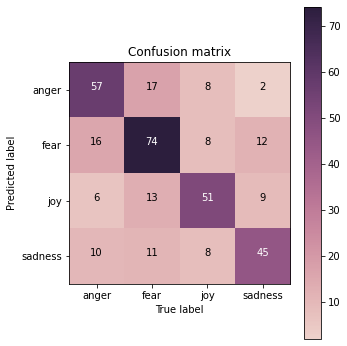

In [15]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
    
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

The training accuracy is 0.99, while testing accuracy is only 0.65.  The huge difference on result means that the model is overfitting.  The scores on each class does not show significant difference, which means the model is balanced on every class.  

### ** >>> End Exercise 3 (Take home): **  

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

training accuracy: 0.8
testing accuracy: 0.71
              precision    recall  f1-score   support

       anger       0.68      0.67      0.67        84
        fear       0.72      0.76      0.74       110
         joy       0.78      0.73      0.76        79
     sadness       0.64      0.65      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.71       347
weighted avg       0.71      0.71      0.71       347



C:\Users\acer\.conda\envs\dataMining\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


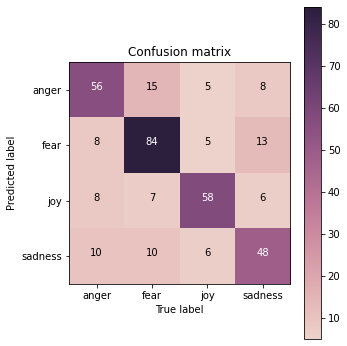

In [16]:
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB(alpha=0)
MNB_model.fit(X_train, y_train)

y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### ** >>> End Exercise 4 (Take home): **  

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The result is closer between training and testing.  Although training accuracy is lower, the model is not overfitting using the naive bayes model.  The `DecisionTreeClassifier` is a greedy method to split the data depending on the features, so it is easier to overfit on the training dataset and works bad on testing if the samples are not enough and value distributions are different on training and testing.  While `Bayesian Classifiers` consider each feature as random variables and estimate the probability of belonging to different classes.  Thus, `Bayesian Classifers` is less likely to overfit. 

### ** >>> End Exercise 5 (Take home): **  

In [17]:
import keras
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.
C:\Users\acer\.conda\envs\dataMining\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\acer\.conda\envs\dataMining\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\acer\.conda\envs\dataMining\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\acer\.conda\envs\dataMining\lib\sit

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 0    anger
1    anger
2    anger
3    anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [18]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

input_shape:  500
output_shape:  4
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)     

In [19]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 72us/step - loss: 1.3304 - accuracy: 0.3645 - val_loss: 1.2781 - val_accuracy: 0.4352
Epoch 2/25
3613/3613 [==============================] - 0s 40us/step - loss: 0.9967 - accuracy: 0.6288 - val_loss: 0.9074 - val_accuracy: 0.6628
Epoch 3/25
3613/3613 [==============================] - 0s 40us/step - loss: 0.5794 - accuracy: 0.7966 - val_loss: 0.7934 - val_accuracy: 0.6888
Epoch 4/25
3613/3613 [==============================] - 0s 41us/step - loss: 0.4032 - accuracy: 0.8519 - val_loss: 0.7774 - val_accuracy: 0.7147
Epoch 5/25
3613/3613 [==============================] - 0s 41us/step - loss: 0.3155 - accuracy: 0.8882 - val_loss: 0.7905 - val_accuracy: 0.7118
Epoch 6/25
3613/3613 [==============================] - 0s 41us/step - loss: 0.2558 - accuracy: 0.9125 - val_loss: 0.8549 - val_accuracy: 0.7089
Epoch 7/25
3613/3613 [==============================] - 0s 40us/step - loss: 0.210

In [20]:
from sklearn.metrics import accuracy_score
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [21]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.364517,1.330440,0.435158,1.278136
1,1,0.628840,0.996676,0.662824,0.907441
2,2,0.796568,0.579433,0.688761,0.793378
3,3,0.851924,0.403238,0.714697,0.777437
4,4,0.888182,0.315466,0.711816,0.790495
5,5,0.912538,0.255817,0.708934,0.854905
6,6,0.931082,0.210540,0.697406,0.921061
7,7,0.949903,0.173929,0.706052,0.952871
8,8,0.954608,0.145514,0.691643,1.041591
9,9,0.962912,0.128177,0.685879,1.081288


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

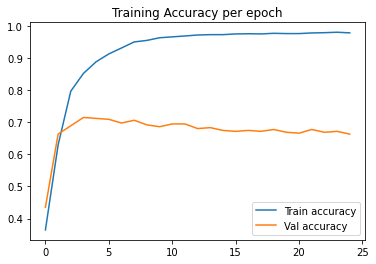

In [22]:
plot_acc_df = pd.DataFrame({'Train accuracy': training_log.accuracy.values,
                     'Val accuracy': training_log.val_accuracy.values},
                    index = training_log.epoch.values)
plot_acc_df.plot.line(title='Training Accuracy per epoch')

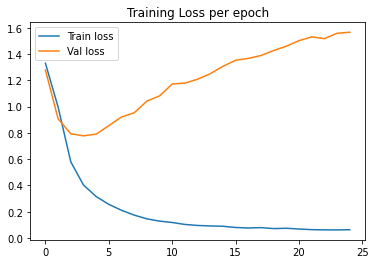

In [23]:
plot_loss_df = pd.DataFrame({'Train loss': training_log.loss.values,
                             'Val loss': training_log.val_loss.values},
                    index = training_log.epoch.values)
plot_loss_df.plot.line(title='Training Loss per epoch')

As we can see in the figures, the loss of validation lowers at first, but rises soon after.  In the same time, the accuracy and loss of the training dataset look well, so the model is overfitting.  

### ** >>> End Exercise 6 (Take home): **  

In [24]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
training_corpus = train_df['text_tokenized'].values

from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

In [25]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.47014445, -0.15648466, -0.11027616,  0.224014  , -0.3357228 ,
       -0.8845855 ,  0.89144266,  1.1465522 , -0.6229304 , -0.527616  ,
       -0.7526013 , -0.79281837, -0.36206853,  0.4138607 , -0.11421101,
       -0.33038694, -0.09675138, -0.20092016,  0.27432242, -1.0655735 ,
        0.46328336,  0.95033634,  0.5749979 ,  0.3785623 ,  0.19624321,
       -0.09437896, -0.34684888,  0.513549  , -0.2875992 ,  0.32467675,
        0.3406271 , -0.03242656,  0.35712644, -0.31498843, -0.1025774 ,
        0.6888622 ,  0.32144648, -0.18890166, -0.68843174, -0.6736497 ,
        0.4838274 , -0.02825598, -0.2881941 ,  0.39382732,  0.84916717,
       -0.3314108 , -0.71489024, -0.27901533,  0.77665234, -0.14546636,
       -0.08755589, -0.02781562,  0.15710278, -0.38706884, -0.08791652,
       -0.41890863,  0.2684342 ,  0.07027033, -0.46872327, -0.06247673,
       -0.09809491, -0.05218516,  0.4892407 ,  0.19030082, -0.550968  ,
        0.7694373 ,  0.31424305,  0.6057044 , -1.439409  ,  0.71

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


We can pad the sequence of words to the same length, then cancate the vectorized words to make the whole sequence vectorized.  

In [26]:
doc_len = train_df['text_tokenized'].apply(lambda x: len(x))
print('Max length: {}'.format(max(doc_len.values)))
print('Mean length: {}'.format(np.mean(doc_len.values)))

Max length: 47
Mean length: 20.057293108220314


As above, we can pad the vectorized sequence length to $47\times 100$(vector dim)$=4700$, while those padded place are all zeros.  

### ** >>> End Exercise 7 (Take home): **  

In [27]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')


load ok


In [28]:
w2v_google_model.most_similar('happy', topn=10)

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [29]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

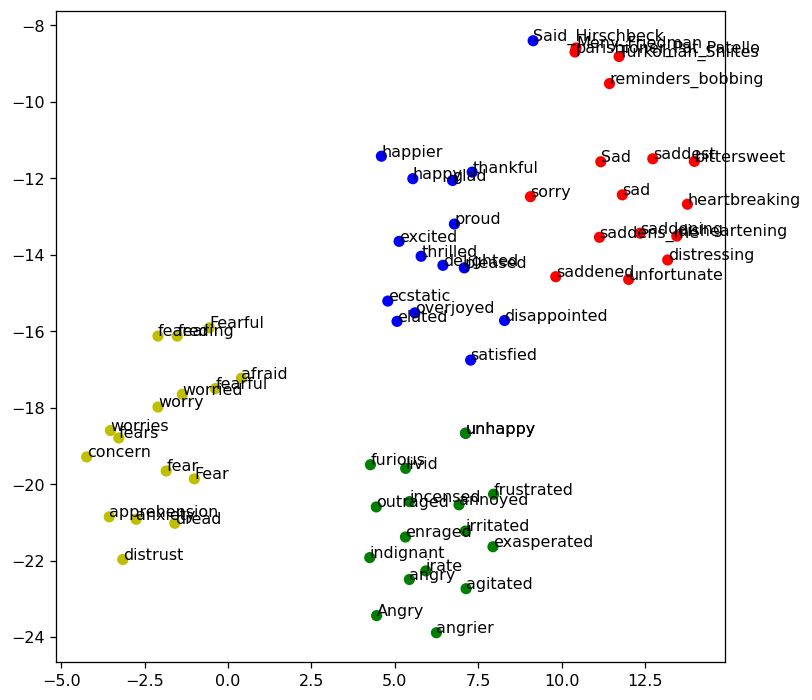

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = model.index_to_key
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### ** >>> End Exercise 8 (Take home): **  